In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data_csv = pd.read_csv('energie.csv',sep=',')
data_csv.head()
data_csv.shape

(3376, 46)

Nous allons regarder les différentes colonnes et leur distribution pour trier les plus exploitables avant manipulation

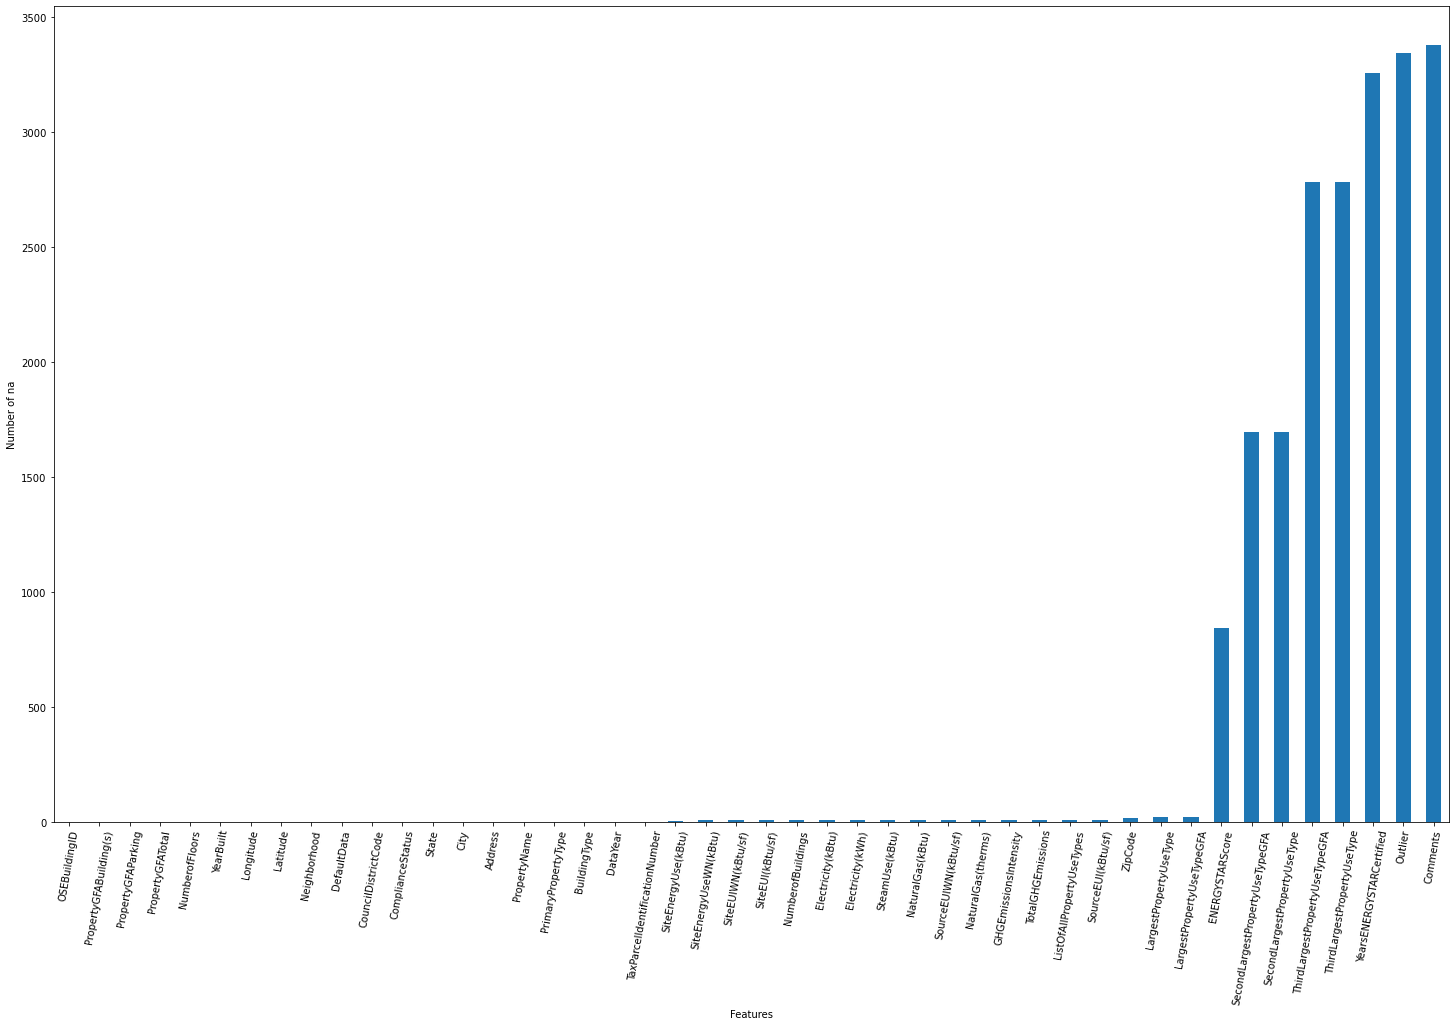

In [3]:
list_na = data_csv.isna().sum()
list_na_sorted = list_na.sort_values()
plt.figure(figsize=(25,15))
list_na_sorted.plot.bar()
plt.xticks(rotation=80)
plt.xlabel('Features')
plt.ylabel('Number of na')
plt.show()

Nouss voyons que dans les colonnes que nous pouvons potentiellement supprimée, nous avons Outlier, ComplianceStatus, Default Data. En regardant cela, nous allons surement pouvoir faciliter le tri des données.

In [4]:
print(data_csv.columns)
print(set(data_csv['Outlier']))
print(set(data_csv['ComplianceStatus']))
print(set(data_csv['DefaultData']))

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [5]:
data_csv_light  = data_csv[(data_csv['Outlier']!='High outlier')&
                          (data_csv['ComplianceStatus']=='Compliant')&
                            (data_csv['DefaultData']==False)&
                          (data_csv['BuildingType'] == 'NonResidential')]


Nous allons maintenant supprimer les colonnes qui ne présentes plus d'intéret pour notre exploration des données. Puis remplir les colonnes encore vides.

In [6]:
data_light = data_csv_light.drop(
['OSEBuildingID', 'DataYear','BuildingType','PropertyName', 'Address', 'City', 'State', 'ZipCode',
'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'ListOfAllPropertyUseTypes',
 'YearsENERGYSTARCertified','SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
'SiteEUI(kBtu/sf)', 'Electricity(kWh)', 'NaturalGas(therms)','ComplianceStatus',
 'GHGEmissionsIntensity','Comments','Outlier','SiteEnergyUseWN(kBtu)','DefaultData'],axis=1)

data_light = data_light.drop_duplicates()

data_light[['SecondLargestPropertyUseType',
            'ThirdLargestPropertyUseType']]= data_light[['SecondLargestPropertyUseType',
                                        'ThirdLargestPropertyUseType']].fillna('None')

data_light = data_light.fillna(0).reset_index(drop=True)
print(data_light.columns)
data_light.head()

Index(['PrimaryPropertyType', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions'],
      dtype='object')


PrimaryPropertyType Neighborhood  Latitude  Longitude  YearBuilt  \
0               Hotel     DOWNTOWN  47.61220 -122.33799       1927   
1               Hotel     DOWNTOWN  47.61317 -122.33393       1996   
2               Hotel     DOWNTOWN  47.61393 -122.33810       1969   
3               Hotel     DOWNTOWN  47.61412 -122.33664       1926   
4               Hotel     DOWNTOWN  47.61375 -122.34047       1980   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0              12             88434                   0   
1                1.0              11            103566               15064   
2                1.0              41            956110              196718   
3                1.0              10             61320                   0   
4                1.0              18            175580               62000   

   PropertyGFABuilding(s)  ... SecondLargestPropertyUseTypeGFA  \
0                   88434  ...                             0.0   
1                   88502  ...                         15064.0   
2                  759392  ...                             0.0   
3                   61320  ...                             0.0   
4                  113580  ...                         68009.0   

   ThirdLargestPropertyUseType ThirdLargestPropertyUseTypeGFA  \
0                         None                            0.0   
1                   Restaurant                         4622.0   
2                         None                            0.0   
3                         None                            0.0   
4                Swimming Pool                            0.0   

   ENERGYSTARScore SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
0             60.0         182.500000            7226362.5      2003882.00   
1             61.0         176.100006            8387933.0            0.00   
2             43.0         241.899994           72587024.0     21566554.00   
3             56.0         216.199997            6794584.0      2214446.25   
4             75.0         211.399994           14172606.0            0.00   

   Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  
0          3946027.0         1276453.0             249.98  
1          3242851.0         5145082.0             295.86  
2         49526664.0         1493800.0            2089.28  
3          2768924.0         1811213.0             286.43  
4          5368607.0         8803998.0             505.01  

[5 rows x 23 columns]

In [7]:
print(set(data_light['Neighborhood']))
data_light['Neighborhood'] = data_light['Neighborhood'].apply(lambda x:x.upper())
data_light.describe()

{'NORTHWEST', 'SOUTHEAST', 'Northwest', 'GREATER DUWAMISH', 'MAGNOLIA / QUEEN ANNE', 'NORTH', 'North', 'Central', 'LAKE UNION', 'DOWNTOWN', 'Ballard', 'NORTHEAST', 'BALLARD', 'SOUTHWEST', 'Delridge', 'DELRIDGE', 'EAST', 'CENTRAL'}


Latitude    Longitude   YearBuilt  NumberofBuildings  \
count  1432.000000  1432.000000  1432.00000        1432.000000   
mean     47.616274  -122.333596  1961.14176           1.032123   
std       0.046483     0.023027    32.86544           0.535610   
min      47.509590  -122.411820  1900.00000           0.000000   
25%      47.587855  -122.342568  1929.00000           1.000000   
50%      47.612790  -122.333210  1965.00000           1.000000   
75%      47.649017  -122.323107  1988.00000           1.000000   
max      47.733870  -122.261800  2015.00000           9.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1432.000000      1.432000e+03         1432.000000   
mean         4.402235      1.132641e+05        14474.143855   
std          6.821284      1.909507e+05        44775.250456   
min          0.000000      1.630000e+04            0.000000   
25%          1.000000      2.937000e+04            0.000000   
50%          3.000000      4.812550e+04            0.000000   
75%          5.000000      1.048548e+05            0.000000   
max         99.000000      1.952220e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            1.432000e+03               1.432000e+03   
mean             9.878993e+04               9.114791e+04   
std              1.668031e+05               1.551625e+05   
min              3.636000e+03               0.000000e+00   
25%              2.830400e+04               2.546150e+04   
50%              4.606350e+04               4.192100e+04   
75%              9.441750e+04               9.008625e+04   
max              1.765970e+06               1.680937e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1432.000000                     1432.000000   
mean                      19707.697135                     3073.293435   
std                       50534.723323                    14803.531164   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       13824.750000                        0.000000   
max                      441551.000000                   303910.000000   

       ENERGYSTARScore  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
count      1432.000000         1432.000000         1.432000e+03   
mean         43.266061          181.423813         7.814269e+06   
std          37.947513          191.489780         1.921578e+07   
min           0.000000            0.000000         5.713320e+04   
25%           0.000000           78.549999         1.219834e+06   
50%          47.000000          137.199997         2.650598e+06   
75%          80.000000          210.375004         6.968646e+06   
max         100.000000         2620.000000         2.930908e+08   

       SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  
count    1.432000e+03       1.432000e+03      1.432000e+03        1432.000000  
mean     5.083826e+05       5.555264e+06      1.709228e+06         168.746131  
std      5.497471e+06       1.335426e+07      5.693273e+06         591.035454  
min      0.000000e+00      -1.154170e+05      0.000000e+00          -0.800000  
25%      0.000000e+00       7.200730e+05      0.000000e+00          19.760000  
50%      0.000000e+00       1.711462e+06      4.420870e+05          48.240000  
75%      0.000000e+00       5.143690e+06      1.399705e+06         134.600000  
max      1.349435e+08       2.745325e+08      1.381912e+08       12307.160000

On rassemble ici les mêmes types d'endroits. Ensuite, on calcul le pourcentage des sources d'énergie pour à la suite définir un nouveau paramètre le type d'énergie utilisé dans le l'établissement. 

In [8]:
data_light['Somme']=data_light['SteamUse(kBtu)']+data_light['Electricity(kBtu)']+data_light['NaturalGas(kBtu)']
data_light['Steamperc'] =data_light['SteamUse(kBtu)']/data_light['Somme']
data_light['Elecperc'] =data_light['Electricity(kBtu)']/data_light['Somme']
data_light['Gasperc'] =data_light['NaturalGas(kBtu)']/data_light['Somme']


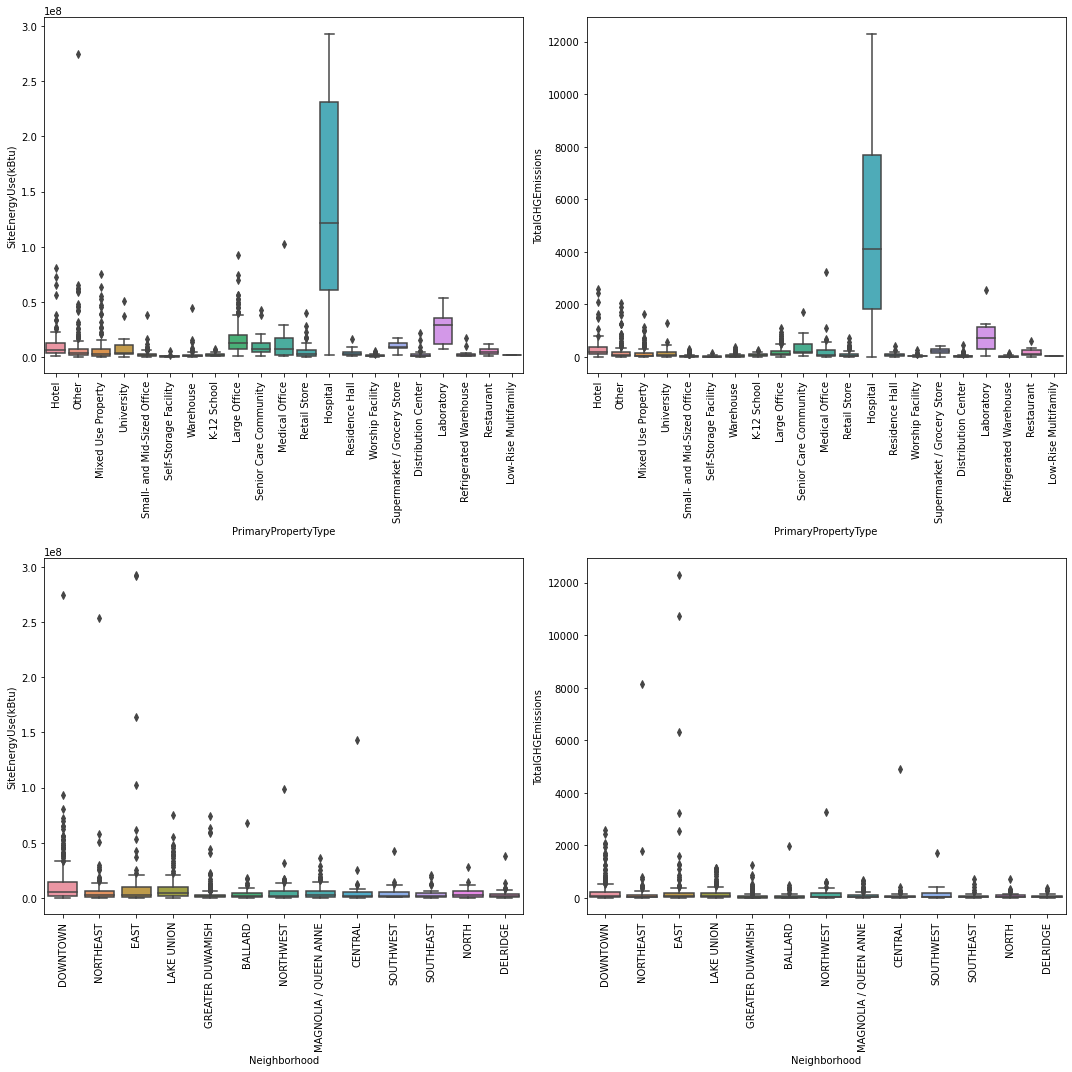

In [35]:
figure,axes = plt.subplots(2,2,figsize=(15,15))

sns.boxplot(data=data_light,x='PrimaryPropertyType',y='SiteEnergyUse(kBtu)',ax = axes[0,0])
sns.boxplot(data=data_light,x='PrimaryPropertyType',y='TotalGHGEmissions',ax = axes[0,1])
sns.boxplot(data=data_light,x='Neighborhood',y='SiteEnergyUse(kBtu)',ax = axes[1,0])

sns.boxplot(data=data_light,x='Neighborhood',y='TotalGHGEmissions',ax = axes[1,1])
for i in range(2):
    for j in range(2) : 
        plt.sca(axes[i,j])
        plt.xticks(rotation=90)
figure.tight_layout()        
plt.show()

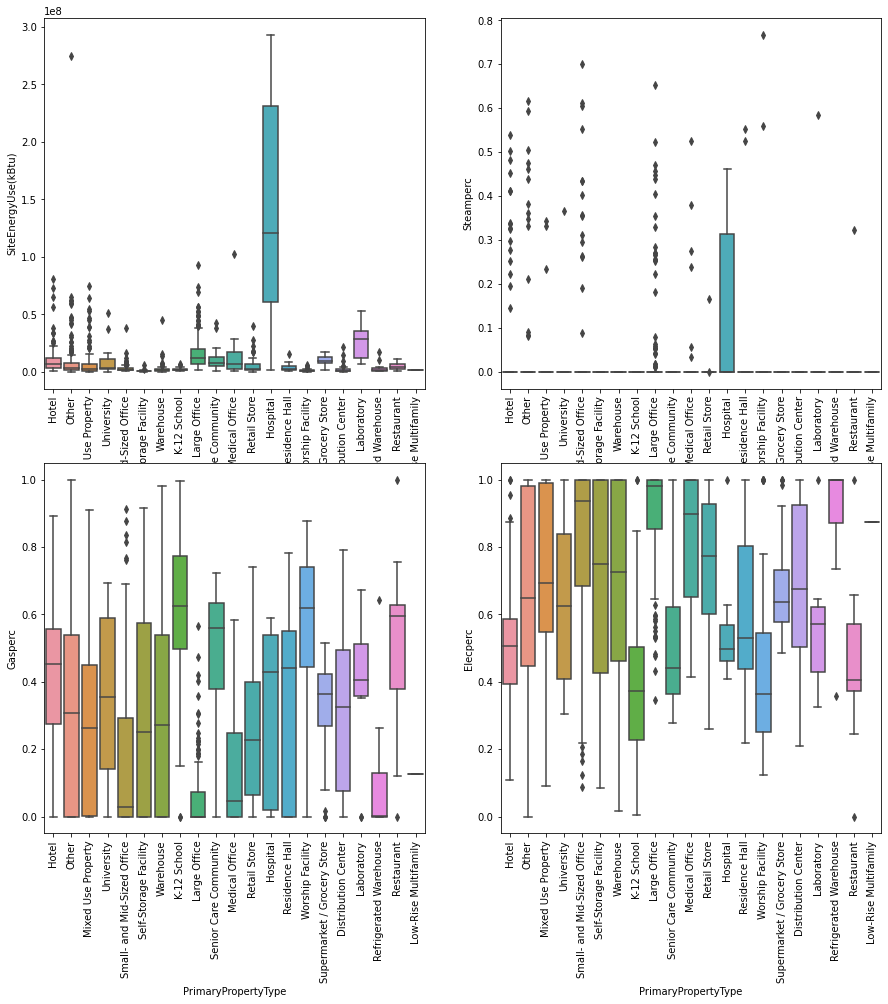

In [9]:
figure,axes = plt.subplots(2,2,figsize=(15,15))

sns.boxplot(data=data_light,x='PrimaryPropertyType',y='SiteEnergyUse(kBtu)',ax = axes[0,0])
sns.boxplot(data=data_light,x='PrimaryPropertyType',y='Steamperc',ax = axes[0,1])
sns.boxplot(data=data_light,x='PrimaryPropertyType',y='Elecperc',ax = axes[1,1])

sns.boxplot(data=data_light,x='PrimaryPropertyType',y='Gasperc',ax = axes[1,0])
for i in range(2):
    for j in range(2) : 
        plt.sca(axes[i,j])
        plt.xticks(rotation=90)
plt.show()

Les type d'établissement à une importance sur plusieurs facteur et surtout sur la consommation en électricité.

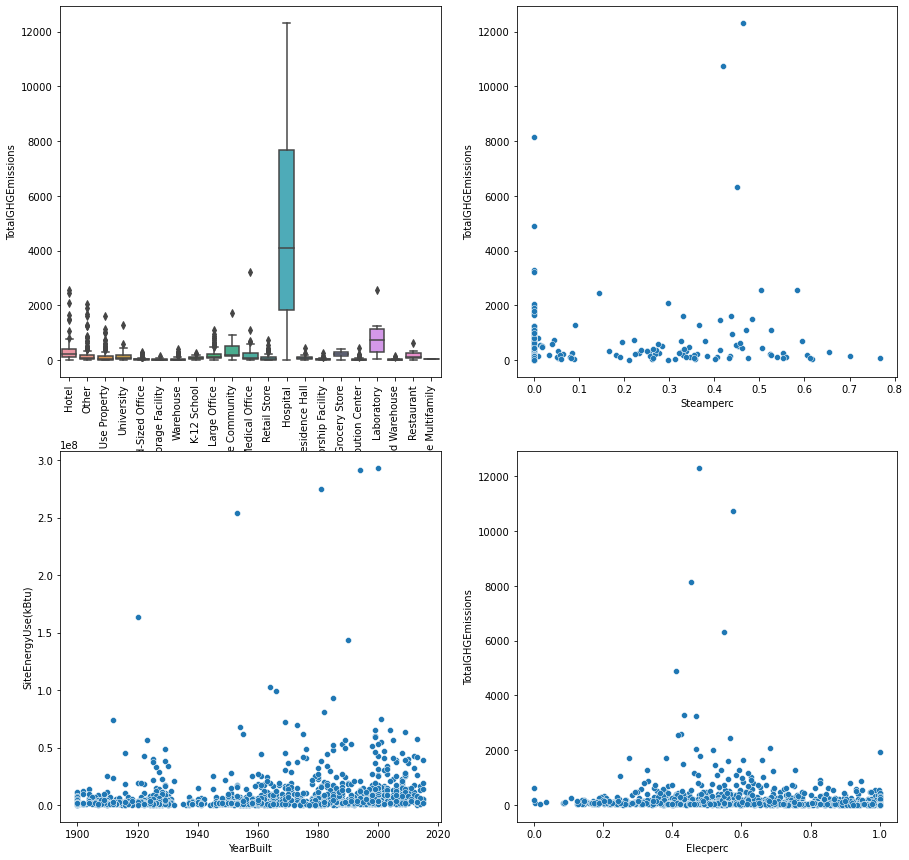

In [10]:
figure,axes = plt.subplots(2,2,figsize=(15,15))

sns.boxplot(data=data_light,x='PrimaryPropertyType',y='TotalGHGEmissions',ax = axes[0,0])
sns.scatterplot(data=data_light,x='Steamperc',y='TotalGHGEmissions',ax = axes[0,1])
sns.scatterplot(data=data_light,x='Elecperc',y='TotalGHGEmissions',ax = axes[1,1])

sns.scatterplot(data=data_light,y='SiteEnergyUse(kBtu)',x='YearBuilt',ax = axes[1,0])
plt.sca(axes[0,0])
plt.xticks(rotation=90)
plt.show()


Aucune reltion particulière mise en avant

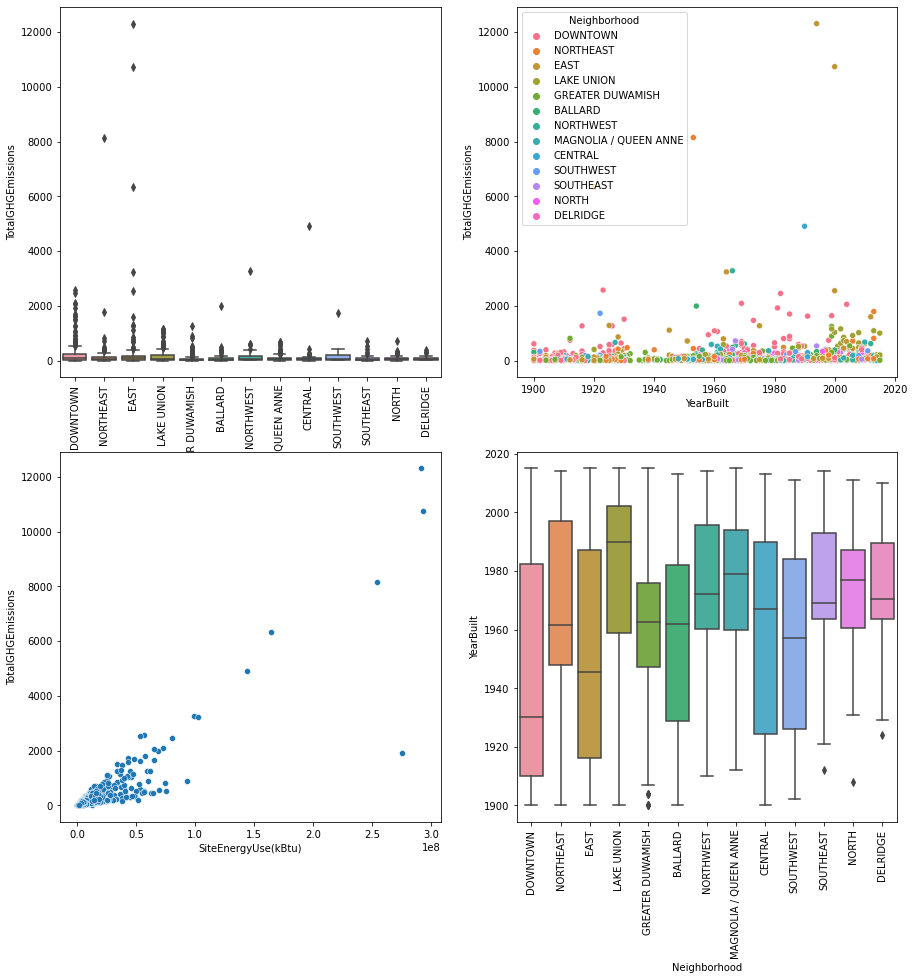

In [11]:
figure,axes = plt.subplots(2,2,figsize=(15,15))

sns.boxplot(data=data_light,x='Neighborhood',y='TotalGHGEmissions',ax = axes[0,0])
sns.scatterplot(data=data_light,x='YearBuilt',y='TotalGHGEmissions',hue='Neighborhood',ax = axes[0,1])
sns.boxplot(data=data_light,y='YearBuilt',x='Neighborhood',ax = axes[1,1])

sns.scatterplot(data=data_light,x='SiteEnergyUse(kBtu)',y='TotalGHGEmissions',ax = axes[1,0])

plt.sca(axes[0,0])
plt.xticks(rotation=90)
plt.sca(axes[1,1])
plt.xticks(rotation=90)
plt.show()

In [12]:
data_light['YearBuilt_cat']=data_light['YearBuilt'].apply(lambda x : int(x/10)*10)
data_light['YearBuilt_cat'].head()

0    1920
1    1990
2    1960
3    1920
4    1980
Name: YearBuilt_cat, dtype: int64

In [13]:
listElec = data_light[data_light['Elecperc']>0.6] 
listSteam = data_light[data_light['Steamperc']>0.6]
listGas = data_light[data_light['Gasperc']>0.6]
listElec_Steam = listElec[listElec['Steamperc']>0.20]
listElec_Gas = listElec[listElec['Gasperc']>0.20]
listfullElec = listElec.drop(listElec_Gas.index).drop(listElec_Steam.index)[listElec['Steamperc']<0.10]
listElec_Steam_Gas = listElec.drop(listElec_Gas.index).drop(listElec_Steam.index).drop(listfullElec.index)
listSteam_Gas_Elec = data_light.drop(listElec.index).drop(listSteam.index).drop(listGas.index)
list_tri = pd.concat([listElec_Steam_Gas,listSteam_Gas_Elec])
TypeSource = {'Electricity_only':listfullElec,'Electricity_Gas': listElec_Gas,
              'Electricity_Steam':listElec_Steam,'Gas':listGas,'Steam':listSteam,'mix':list_tri}
data_light['Source_Cat'] = 'test'
for key in TypeSource :
     data_light['Source_Cat'].loc[TypeSource[key].index] = key
data_light.head()

/tmp/ipykernel_48896/3469246303.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listfullElec = listElec.drop(listElec_Gas.index).drop(listElec_Steam.index)[listElec['Steamperc']<0.10]
/tmp/ipykernel_48896/3469246303.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_light['Source_Cat'].loc[TypeSource[key].index] = key


PrimaryPropertyType Neighborhood  Latitude  Longitude  YearBuilt  \
0               Hotel     DOWNTOWN  47.61220 -122.33799       1927   
1               Hotel     DOWNTOWN  47.61317 -122.33393       1996   
2               Hotel     DOWNTOWN  47.61393 -122.33810       1969   
3               Hotel     DOWNTOWN  47.61412 -122.33664       1926   
4               Hotel     DOWNTOWN  47.61375 -122.34047       1980   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0              12             88434                   0   
1                1.0              11            103566               15064   
2                1.0              41            956110              196718   
3                1.0              10             61320                   0   
4                1.0              18            175580               62000   

   PropertyGFABuilding(s)  ... SteamUse(kBtu)  Electricity(kBtu)  \
0                   88434  ...     2003882.00          3946027.0   
1                   88502  ...           0.00          3242851.0   
2                  759392  ...    21566554.00         49526664.0   
3                   61320  ...     2214446.25          2768924.0   
4                  113580  ...           0.00          5368607.0   

  NaturalGas(kBtu)  TotalGHGEmissions        Somme  Steamperc  Elecperc  \
0        1276453.0             249.98   7226362.00   0.277302  0.546060   
1        5145082.0             295.86   8387933.00   0.000000  0.386609   
2        1493800.0            2089.28  72587018.00   0.297113  0.682307   
3        1811213.0             286.43   6794583.25   0.325913  0.407519   
4        8803998.0             505.01  14172605.00   0.000000  0.378802   

    Gasperc  YearBuilt_cat         Source_Cat  
0  0.176638           1920                mix  
1  0.613391           1990                Gas  
2  0.020579           1960  Electricity_Steam  
3  0.266567           1920                mix  
4  0.621198           1980                Gas  

[5 rows x 29 columns]

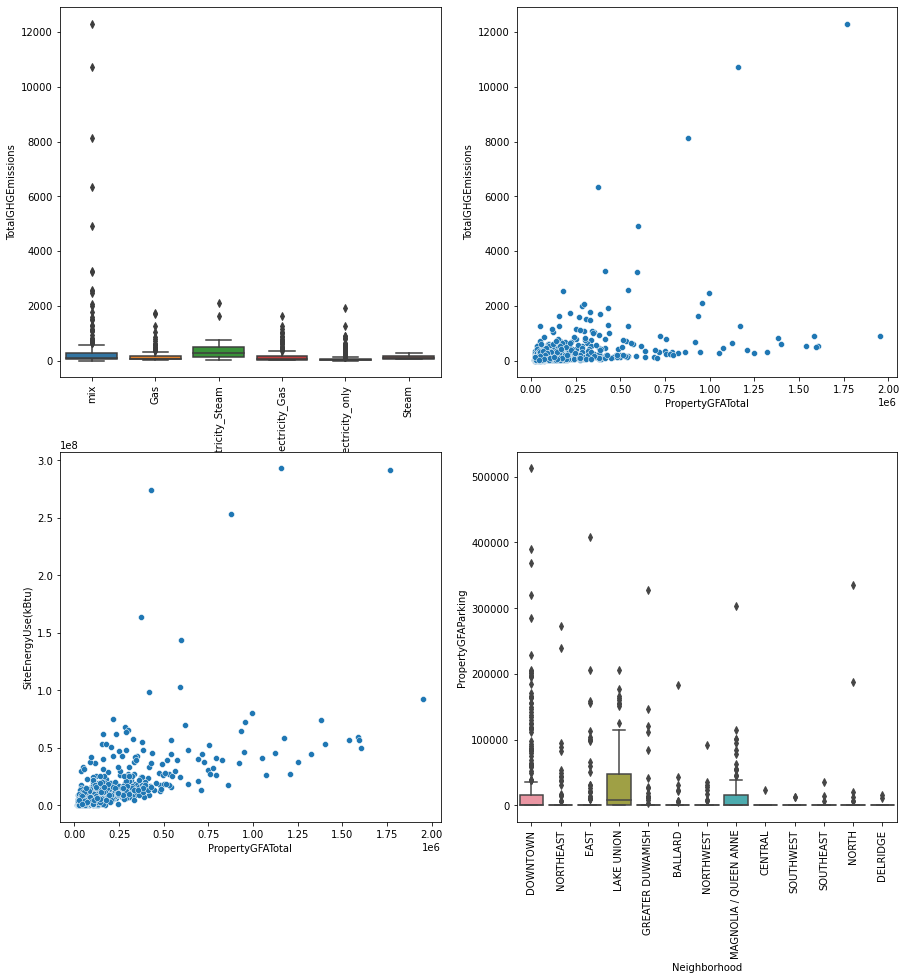

In [14]:
figure,axes = plt.subplots(2,2,figsize=(15,15))

sns.boxplot(data = data_light, y=  'TotalGHGEmissions', x ='Source_Cat',ax = axes[0,0])
sns.scatterplot(data=data_light,x='PropertyGFATotal',y='TotalGHGEmissions',ax = axes[0,1])
sns.boxplot(data=data_light,y='PropertyGFAParking',x='Neighborhood',ax = axes[1,1])

sns.scatterplot(data=data_light,y='SiteEnergyUse(kBtu)',x='PropertyGFATotal',ax = axes[1,0])

plt.sca(axes[0,0])
plt.xticks(rotation=90)
plt.sca(axes[1,1])
plt.xticks(rotation=90)
plt.show()


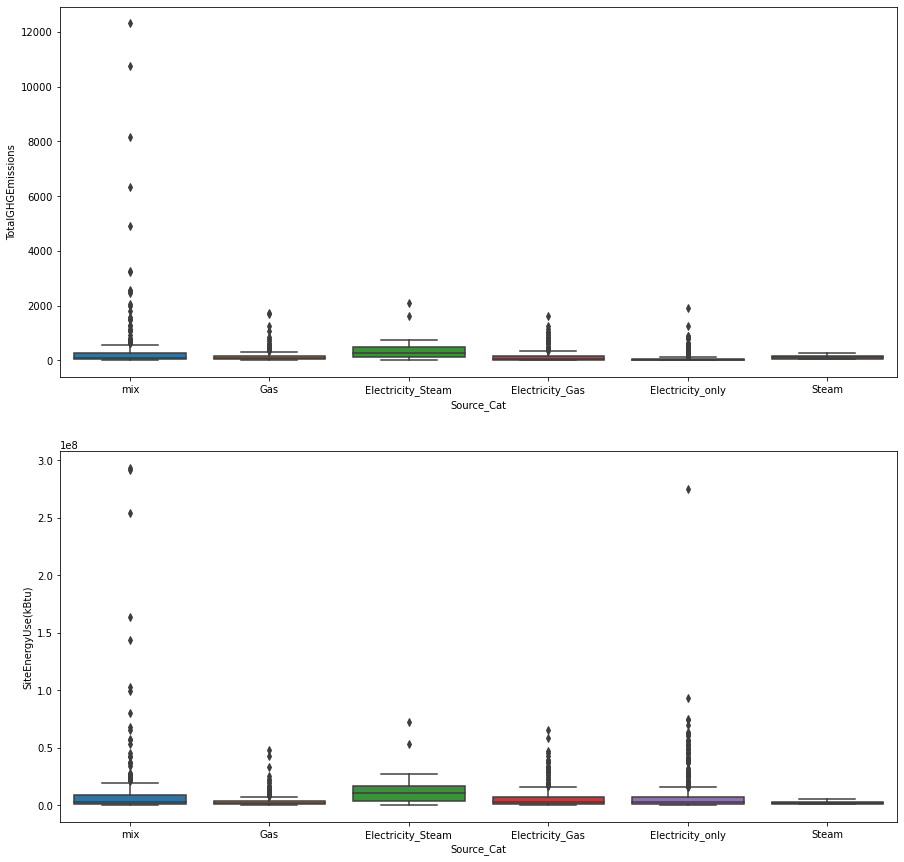

In [36]:
figure,axes = plt.subplots(2,1,figsize=(15,15))

sns.boxplot(data = data_light, y=  'TotalGHGEmissions', x ='Source_Cat',ax = axes[0])
sns.boxplot(data=data_light,x='Source_Cat',y='SiteEnergyUse(kBtu)',ax = axes[1])


plt.show()

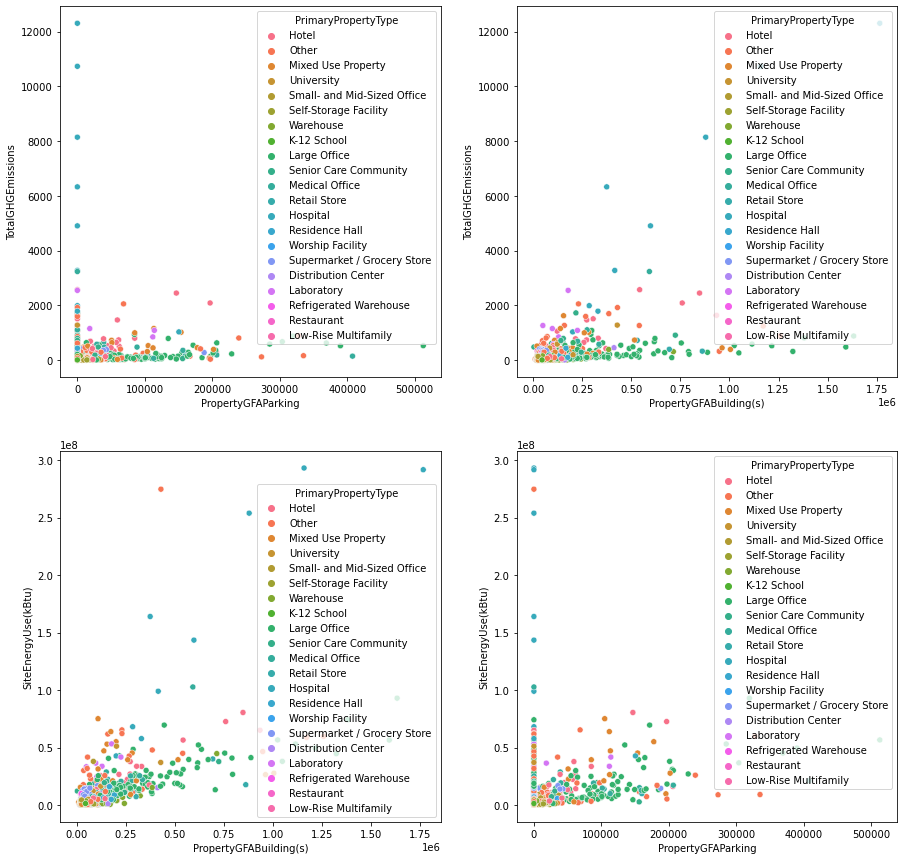

In [15]:
figure,axes = plt.subplots(2,2,figsize=(15,15))

sns.scatterplot(data = data_light, x=  'PropertyGFAParking', y ='TotalGHGEmissions',hue='PrimaryPropertyType',
                ax = axes[0,0])
sns.scatterplot(data=data_light,x='PropertyGFABuilding(s)',y='TotalGHGEmissions',hue='PrimaryPropertyType',
                ax = axes[0,1])
sns.scatterplot(data=data_light,x='PropertyGFAParking',y='SiteEnergyUse(kBtu)',hue='PrimaryPropertyType',
                ax = axes[1,1])

sns.scatterplot(data=data_light,y='SiteEnergyUse(kBtu)',x='PropertyGFABuilding(s)',hue='PrimaryPropertyType',
                ax = axes[1,0])
plt.show()


Pour faire une analyse grossière, nous allons encoder en fonction de la moyenne toutes les colonnes catégorielles ensemble. Nous ne poursuivrons pas néanmoins avec cet encoder plus tard pour éviter toute fuite de données.

In [16]:
def encoder_energy (data,list_col) :
    encoder = data.groupby(list_col)['SiteEnergyUse(kBtu)'].mean()
    encoded_cat = []
    for i in range(len(data)):
        encoded_cat.append(encoder[
            tuple( data_light.loc[i,list_col])])
    return encoded_cat

def encoder_emission (data,list_col) :
    encoder = data.groupby(list_col)['TotalGHGEmissions'].mean()
    encoded_cat = []
    for i in range(len(data)):
        encoded_cat.append(encoder[
            tuple( data_light.loc[i,list_col])])
    return encoded_cat

data_light.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'Somme', 'Steamperc', 'Elecperc', 'Gasperc',
       'YearBuilt_cat', 'Source_Cat'],
      dtype='object')

In [17]:
list_cat_building = ['YearBuilt_cat','Source_Cat','Neighborhood','PrimaryPropertyType']
list_cat_use = ['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']

data_light['Encoded_cat_building_energy'] =  encoder_energy(data_light,list_cat_building)
data_light['Encoded_cat_use_energy'] = encoder_energy(data_light,list_cat_use)

data_light['Encoded_cat_building_emission'] = encoder_emission(data_light,list_cat_building)
data_light['Encoded_cat_use_emission'] = encoder_emission(data_light,list_cat_use)

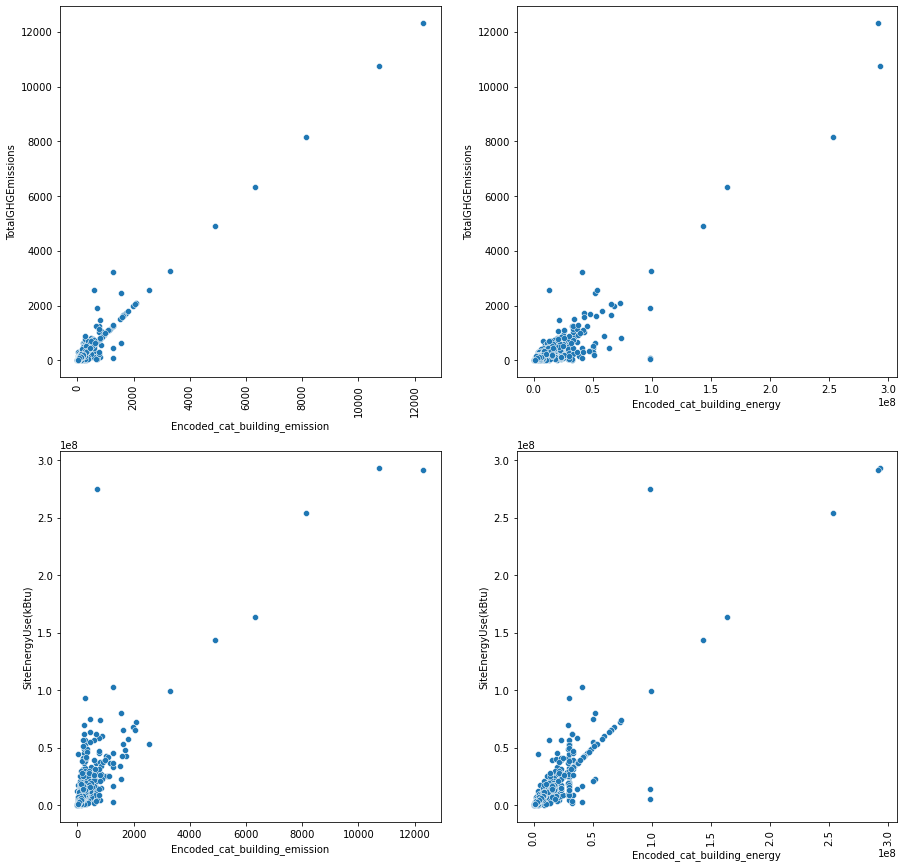

In [18]:
figure,axes = plt.subplots(2,2,figsize=(15,15))

sns.scatterplot(data = data_light, y=  'TotalGHGEmissions', x ='Encoded_cat_building_emission',ax = axes[0,0])
sns.scatterplot(data=data_light,x='Encoded_cat_building_energy',y='TotalGHGEmissions',ax = axes[0,1])
sns.scatterplot(data=data_light,x='Encoded_cat_building_energy',y='SiteEnergyUse(kBtu)',ax=axes[1,1])
sns.scatterplot(data=data_light,y='SiteEnergyUse(kBtu)',x='Encoded_cat_building_emission',ax = axes[1,0])

plt.sca(axes[0,0])
plt.xticks(rotation=90)
plt.sca(axes[1,1])
plt.xticks(rotation=90)
plt.show()


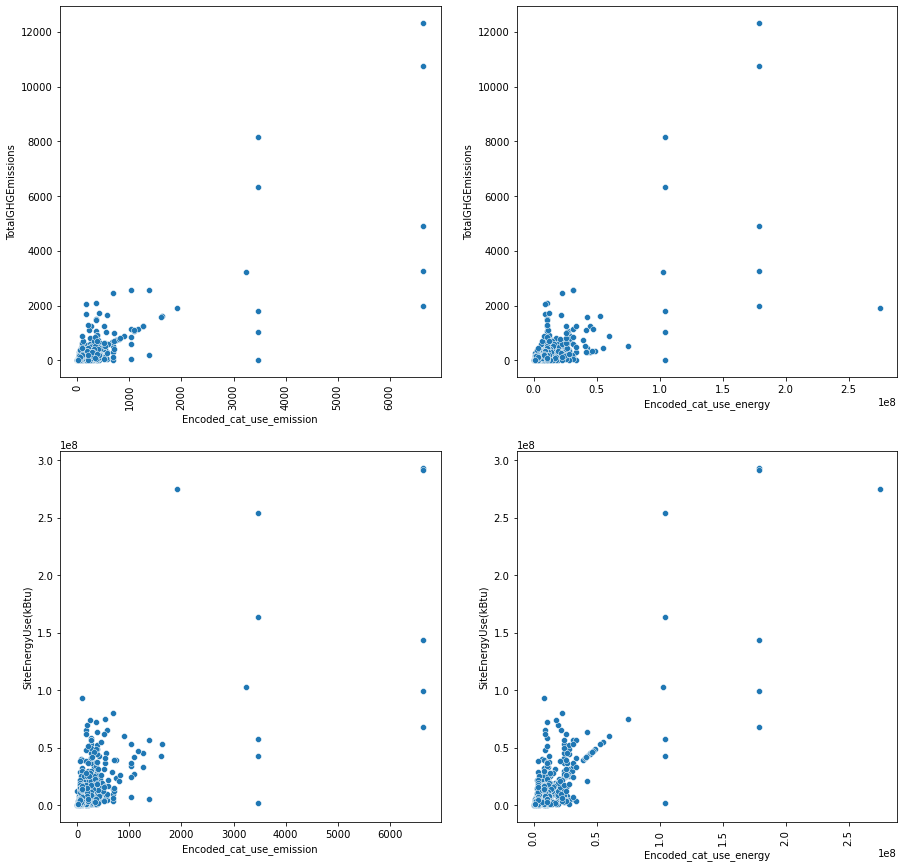

In [19]:
figure,axes = plt.subplots(2,2,figsize=(15,15))

sns.scatterplot(data = data_light, y=  'TotalGHGEmissions', x ='Encoded_cat_use_emission',ax = axes[0,0])
sns.scatterplot(data=data_light,x='Encoded_cat_use_energy',y='TotalGHGEmissions',ax = axes[0,1])
sns.scatterplot(data=data_light,x='Encoded_cat_use_energy',y='SiteEnergyUse(kBtu)',ax=axes[1,1])
sns.scatterplot(data=data_light,y='SiteEnergyUse(kBtu)',x='Encoded_cat_use_emission',ax = axes[1,0])

plt.sca(axes[0,0])
plt.xticks(rotation=90)
plt.sca(axes[1,1])
plt.xticks(rotation=90)
plt.show()


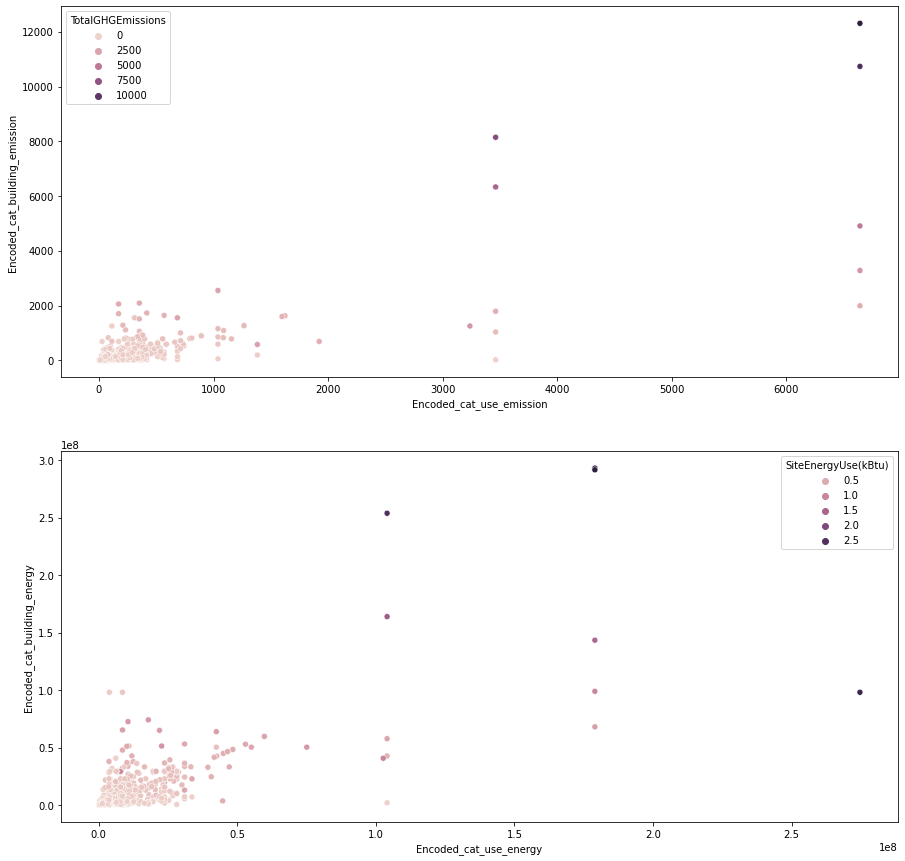

In [20]:
figure,axes = plt.subplots(2,1,figsize=(15,15))

sns.scatterplot(data = data_light,hue='TotalGHGEmissions' ,y=  'Encoded_cat_building_emission', x ='Encoded_cat_use_emission',ax = axes[0])
sns.scatterplot(data=data_light,hue='SiteEnergyUse(kBtu)',x='Encoded_cat_use_energy',y='Encoded_cat_building_energy',ax = axes[1])

plt.show()


In [21]:
list_suppr=['YearBuilt_cat','YearBuilt','Source_Cat','Neighborhood','PrimaryPropertyType',
            'LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType',
            'SiteEnergyUse(kBtu)','SourceEUI(kBtu/sf)','SteamUse(kBtu)', 'Electricity(kBtu)',
            'NaturalGas(kBtu)','TotalGHGEmissions','TotalGHGEmissions','Somme','Steamperc','Elecperc','Gasperc']

data_study = data_light.drop(list_suppr,axis=1)
print(data_study.dtypes)

Latitude                           float64
Longitude                          float64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
Encoded_cat_building_energy        float64
Encoded_cat_use_energy             float64
Encoded_cat_building_emission      float64
Encoded_cat_use_emission           float64
dtype: object


Poursuivons l'analyse par celle par composante principale.

[ 41.30502339  58.34327711  65.75159613  72.39847279  78.48026833
  83.7625987   87.71056938  91.5715942   94.60579881  96.98792946
  98.75319209  99.54159261  99.781852   100.         100.        ]


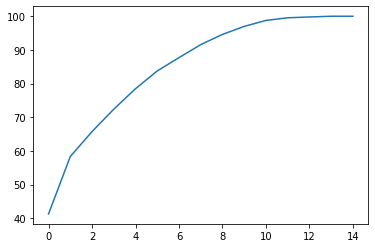

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_study)
pca = PCA(n_components = len(data_study.columns))
pca.fit(X_scaled)
variance_ratio = np.cumsum(pca.explained_variance_ratio_*100)
print(variance_ratio)
plt.plot(variance_ratio)

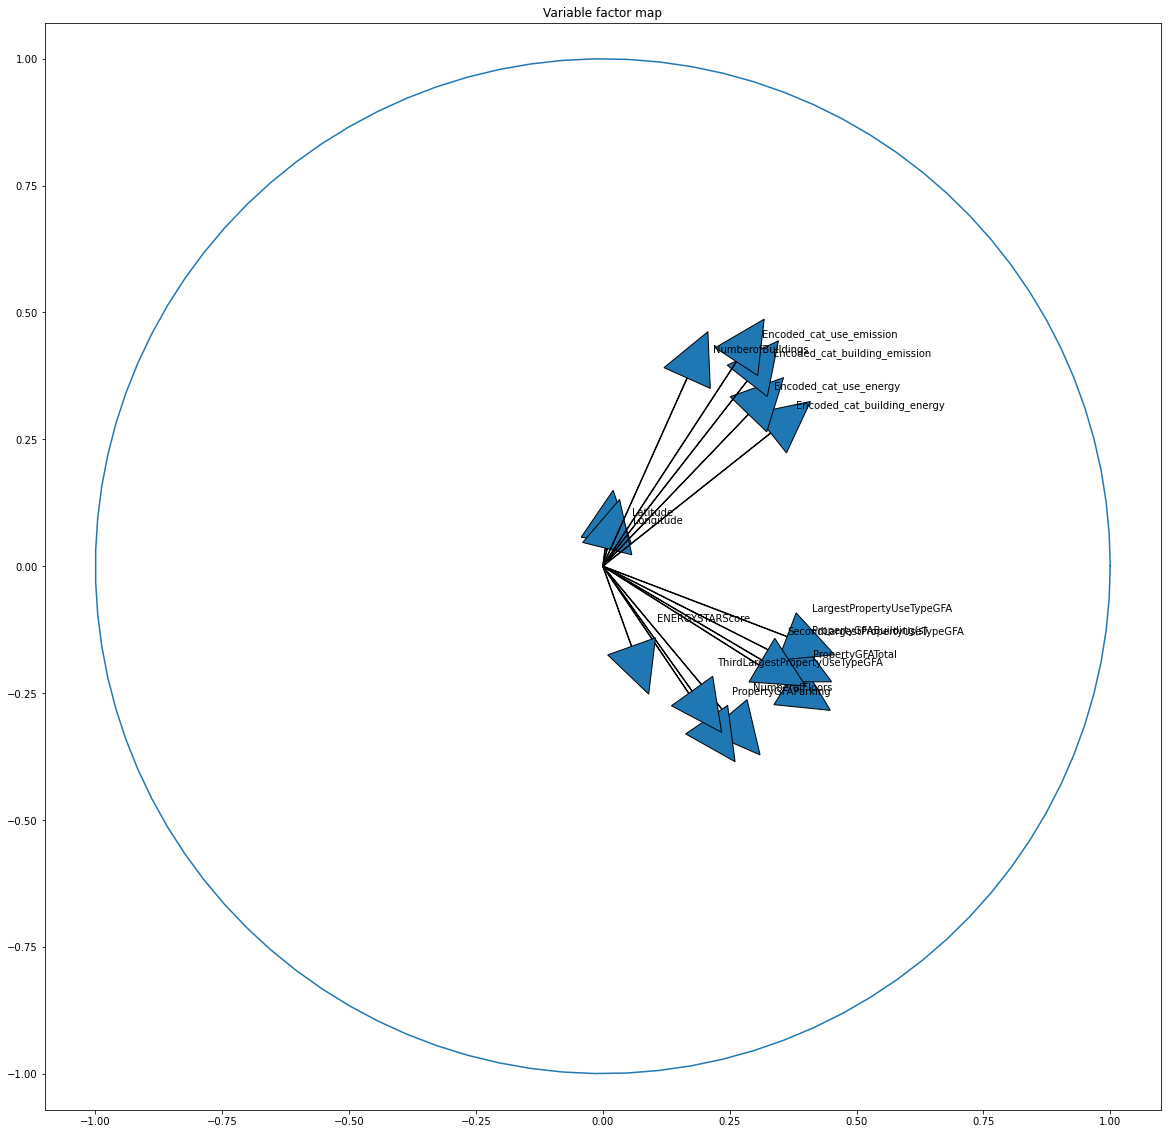

In [23]:

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(20,20))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             data_study.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

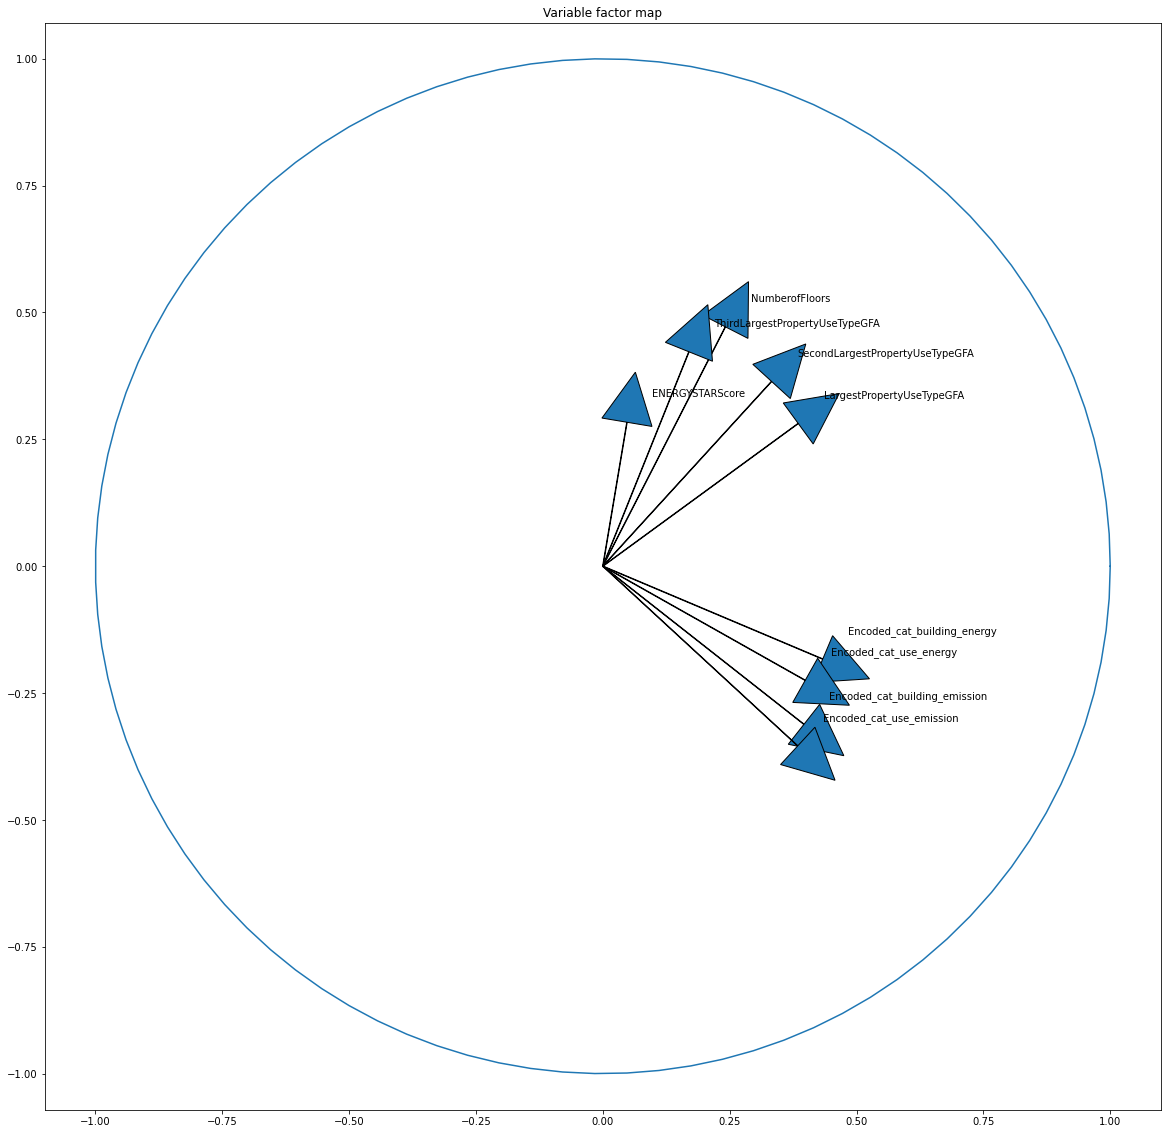

In [24]:
X_red = data_study.drop(['PropertyGFABuilding(s)','PropertyGFAParking',
               'NumberofBuildings','Latitude','Longitude','PropertyGFATotal'],axis=1)
X_red_scaled = scaler.fit_transform(X_red)
pca_red = PCA(n_components=len(X_red.columns))
pca_red.fit(X_red_scaled)

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(20,20))
for i in range(0, pca_red.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca_red.components_[0, i],  #0 for PC1
             pca_red.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca_red.components_[0, i] + 0.05,
             pca_red.components_[1, i] + 0.05,
             X_red.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

Avec cette réduction, nous pouvons voir que nous arriverions à visualiser sur deux paramètres une grande majorité de la variance de nos données. Je vais faire un plot sur PC1 et PC2  de la consommation et de l'émission (à gauche ) ainsi que sur Encoded_cat_building_energy et LargestPropertyUseTypeGFA.(à droite)

<AxesSubplot:xlabel='Encoded_cat_building_energy', ylabel='LargestPropertyUseTypeGFA'>

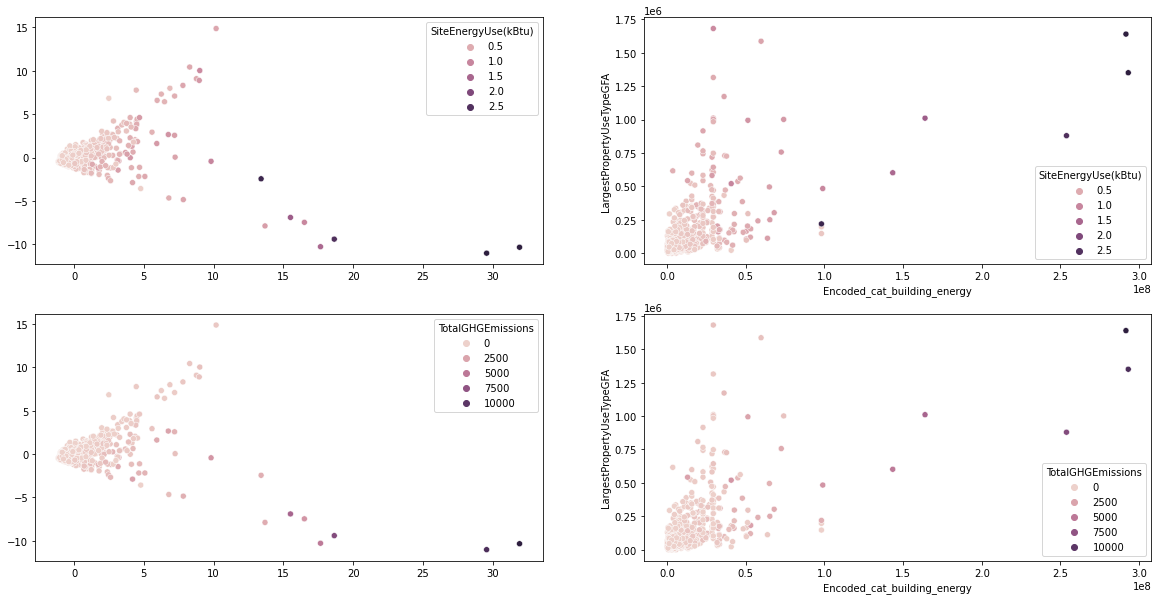

In [38]:
pca_red_2 = PCA(n_components=2)
X_pca_2 = pca_red_2.fit_transform(X_red_scaled)
figure,axes = plt.subplots(2,2,figsize=(20,10))
sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1],hue=data_light['SiteEnergyUse(kBtu)'],ax=axes[0,0])
sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1],hue=data_light['TotalGHGEmissions'],ax=axes[1,0])
sns.scatterplot(data=data_light,y='LargestPropertyUseTypeGFA', x='Encoded_cat_building_energy',hue='SiteEnergyUse(kBtu)',ax=axes[0,1])
sns.scatterplot(data=data_light,y='LargestPropertyUseTypeGFA', x='Encoded_cat_building_energy',hue='TotalGHGEmissions',ax=axes[1,1])


Je souhaitais mettre en évidence que nous avons la possibilités de retravailler plus en profondeur nos paramètres pour établir une évolution plus abordable pour notre capacité à visualiser en 2D. Néanmoins le projet ne repose pas sur ce travail.

In [26]:
data_light.to_csv('energy_clean.csv')